In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.optimizers import SGD
from keras import backend as K

from sklearn.model_selection import train_test_split

In [61]:
labels = ["closeUp", "getAway", "giveNotebook", "hug", "kick", "punch", "push", "shakeHands"]

X = []
y = []
no_of_timesteps = 10

count = 0
for label in labels:
  data = pd.read_csv(label + ".txt")
  print(data.shape)
  dataset = data.iloc[:,2:].values
  n_sample = len(dataset)
  for i in range(no_of_timesteps, n_sample):
      X.append(dataset[i-no_of_timesteps:i,:])
      y.append(count)

  count += 1

X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(895, 92)
(701, 92)
(850, 92)
(596, 92)
(774, 92)
(757, 92)
(1050, 92)
(553, 92)
(6096, 10, 90) (6096,)
(4876, 10, 90) (4876,) (1220, 10, 90) (1220,)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 10, 256)             │         355,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_66 (LSTM)                       │ (None, 10, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_67 (LSTM)                       │ (None, 10, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_68 (LSTM)                       │ (None, 10, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_69 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 979,976 (3.74 MB)

 Trainable params: 979,976 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

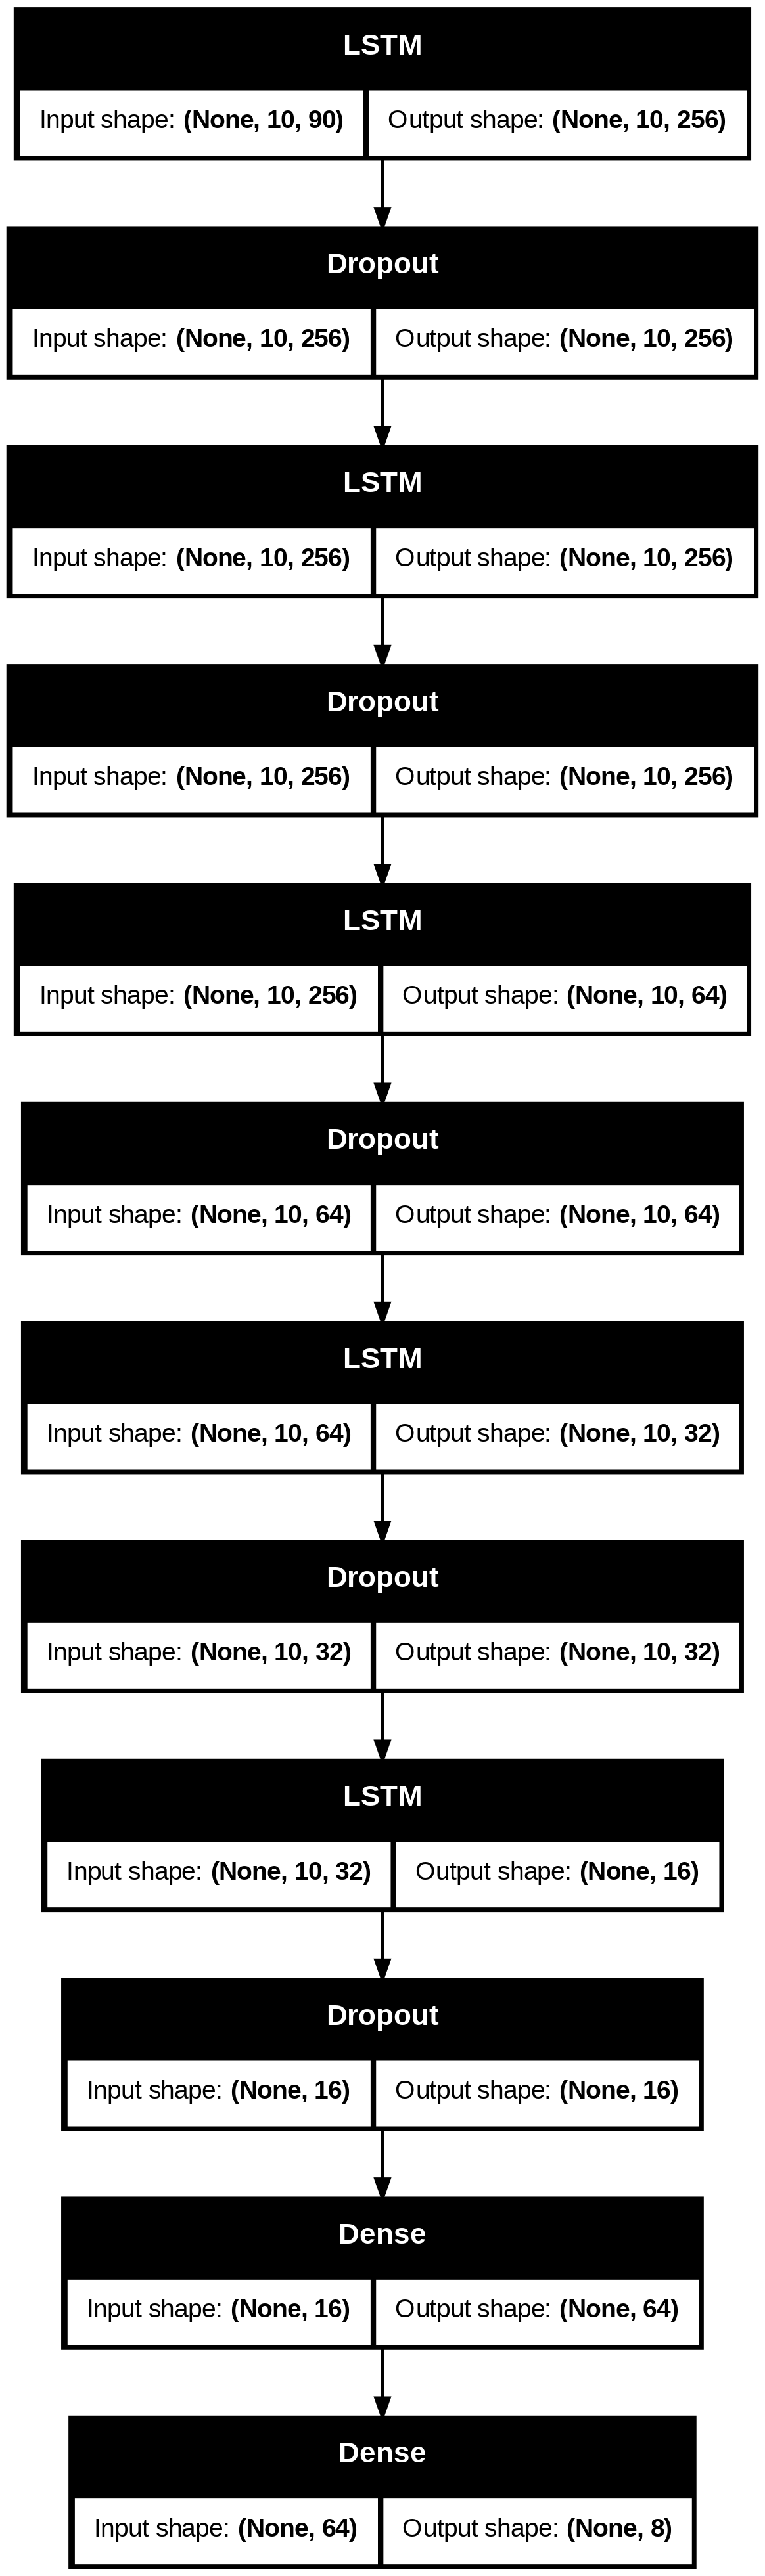

In [72]:
model  = Sequential()
model.add(LSTM(units = 256, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 16))
model.add(Dropout(0.2))
# model.add(Dense(units = 512, activation="relu"))
# model.add(Dense(units = 256, activation="relu"))
model.add(Dense(units = 64, activation="relu"))
model.add(Dense(units = 8, activation="sigmoid"))
model.summary()

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Assuming your y has unique values (0, 1, 2)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Now use y_train_encoded and y_test_encoded for training
model.compile(optimizer="adam", metrics=['accuracy'], loss="categorical_crossentropy")
history = model.fit(X_train, y_train_encoded, epochs=256, batch_size=128, validation_data=(X_test, y_test_encoded))

Epoch 1/256


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1654 - loss: 2.0680 - val_accuracy: 0.1721 - val_loss: 2.0566
Epoch 2/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1808 - loss: 2.0611 - val_accuracy: 0.1721 - val_loss: 2.0581
Epoch 3/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1705 - loss: 2.0624 - val_accuracy: 0.1721 - val_loss: 2.0557
Epoch 4/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1758 - loss: 2.0615 - val_accuracy: 0.1721 - val_loss: 2.0559
Epoch 5/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1634 - loss: 2.0695 - val_accuracy: 0.1721 - val_loss: 2.0528
Epoch 6/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1675 - loss: 2.0543 - val_accuracy: 0.1672 - val_loss: 2.1359
Epoch 7/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1807 - loss: 2.0687 - val_accuracy: 0.2098 - val_loss: 1.9929
Epoch 8/256
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2087 - loss: 2.0002 - val_accuracy: 0.1639 - val_l

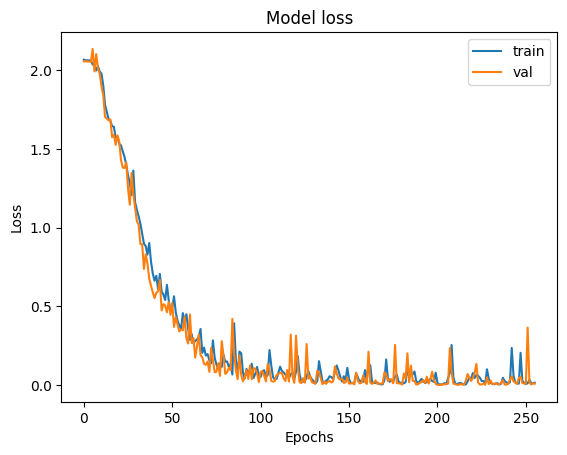

In [64]:
# Visualize the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

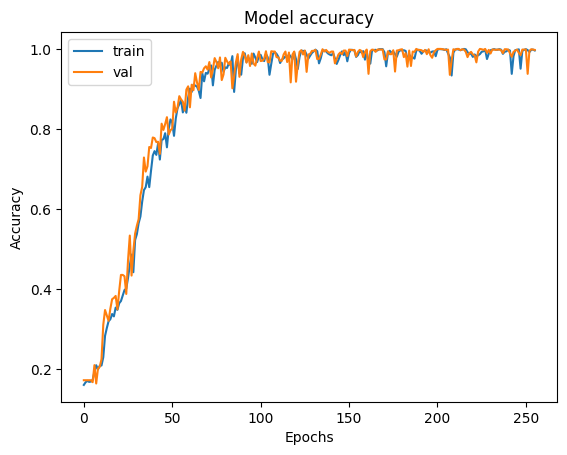

In [65]:
# Visualize the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.9975409836065574
Recall: 0.9975409836065574
Precision: 0.9975775810696267
F1-score: 0.9975438790019518
Confusion Matrix:
 [[171   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0]
 [  0   0 192   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0]
 [  0   0   0   0 147   0   0   0]
 [  0   0   0   0   0 152   0   2]
 [  1   0   0   0   0   0 209   0]
 [  0   0   0   0   0   0   0 101]]


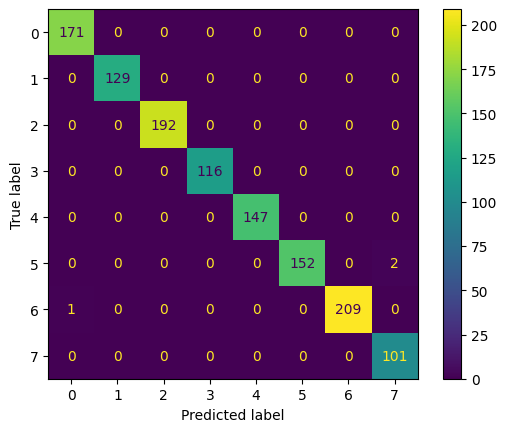

In [66]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class, average='weighted')  # Micro-averaging for multi-class
precision = precision_score(y_test, y_pred_class, average='weighted')
f1_score = f1_score(y_test, y_pred_class, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)
print("Confusion Matrix:\n", cm)

ConfusionMatrixDisplay(cm).plot()
plt.show()